# 1D SEI Model Post-processing

This notebook allows you to construct plots from your output data.

## Identify the data location
Start by naming the file(s) you want to process. 
This is the name of the folder inside the 'output' folder where the results are saved.

In [1]:
detailed_datafolder = 'DOE_12092020_kinet_tenthcond'
homogeneous_datafolder = 'BEST_homogeneous_model_fitting2019-08-16_130129'
reduced_datafolder = 'BEST_reduced_model_fitting2019-08-16_125939'

# Cut-off volume fraction at which we determine an SEI is 'present'
#   in the detailed model:
eps_min = 0.025

# Font size, for plotting:
fs = 12

# This flag indicates whether the next code block has been run
previous = 0

## Now we'll load the data:

### Start with the 'detailed' model:


     Cantera phases created. 

The species in the electrolyte are:
bulk[C3H4O3]
bulk[C4H8O3]
LipElyt
PF6mElyt
C2H6O2(el)
H2O(el)
C2H4
CO
CO2


The species in the SEI are:
LEDC[SEI]
Li2CO3[SEI]
Li2O[SEI]
12
[  2  17  32  47  62  77  92 107 122 137 152 167]
(180, 3329)
15


<IPython.core.display.Javascript object>


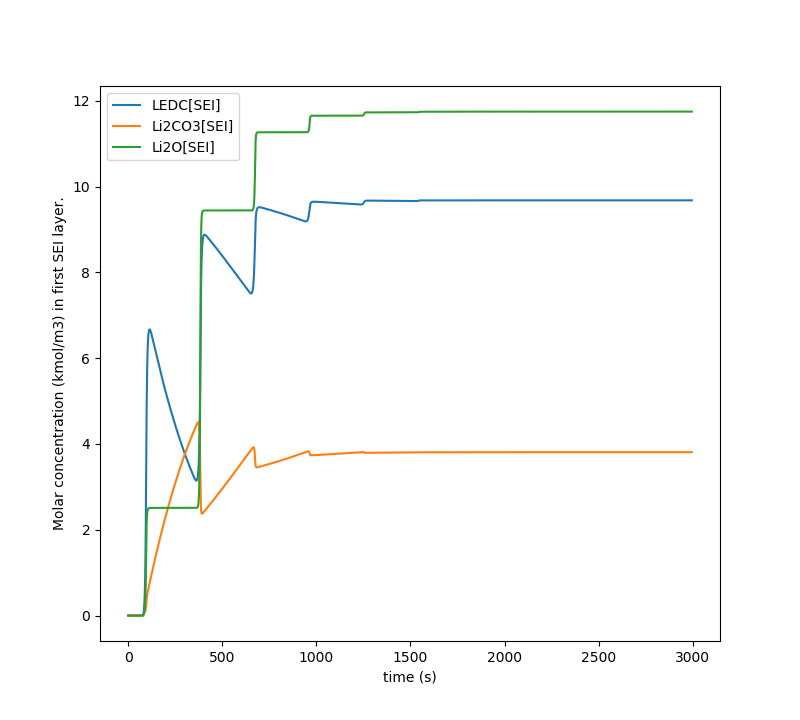

<IPython.core.display.Javascript object>


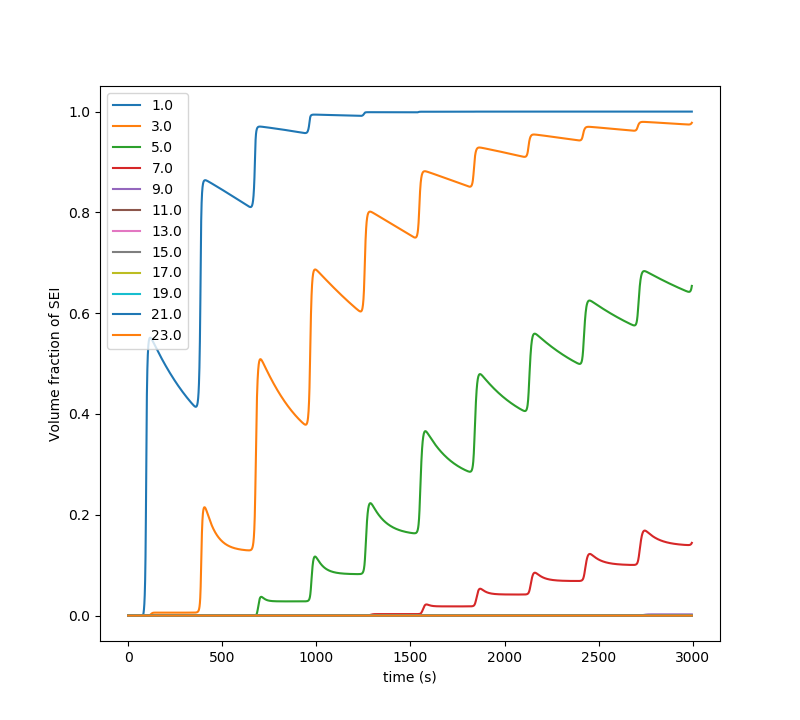

<IPython.core.display.Javascript object>


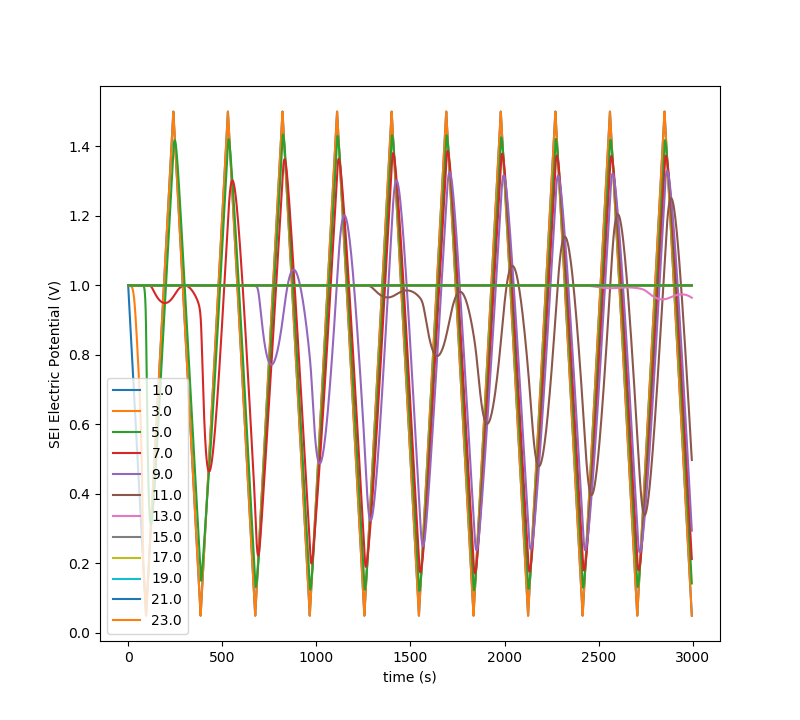

<IPython.core.display.Javascript object>


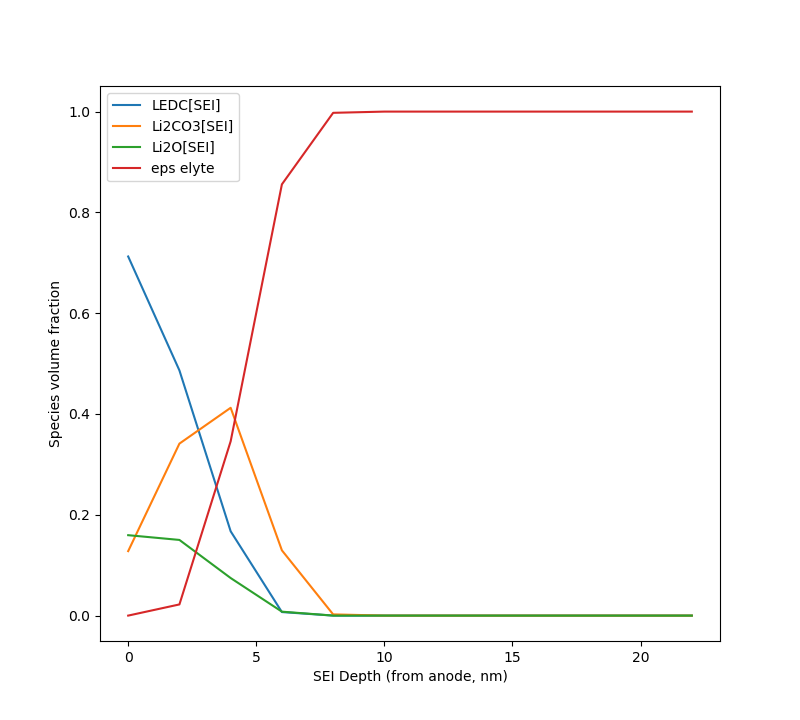

<IPython.core.display.Javascript object>


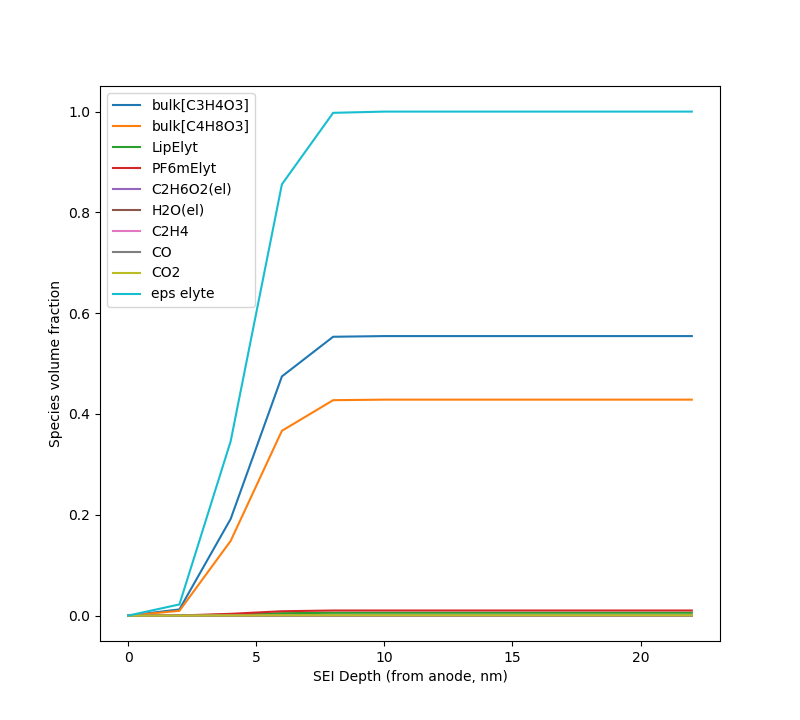

In [2]:
%matplotlib notebook  
from sei_1d_outputs_detailed import plot_data
import os, csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# If you've run this block before, re-set chdir back to its original value, first:
if previous:
    os.chdir(cwd)
    
# Get the current working directory:
cwd = os.getcwd()
previous = 1
#os.chdir(cwd+'/output/'+detailed_datafolder)
os.chdir('C:\\Users\\MARCUS\\PycharmProjects\\1D-SEI-Model'+'/output/'+detailed_datafolder)

detailed_data = pd.read_csv('solution.csv',header=0)
SV_detailed = detailed_data.to_numpy()

# Get variable names:
f = open('names.csv','r')
names = csv.reader(f)
# data_names = detailed_data.index.to_list()

# i=0
# for row in names:
#     data_names[i]=(str('\t'.join(row)))
#     i+=1

# f.close()

# detailed_data.index = data_names

# Transpose the data so that each row is for a time, and each column represents a variable:
detailed_data = detailed_data.T



from sei_1d_init import N_y, dy, nvars_node, objs, params
from sei_1d_init import SVptr as SVptr_detailed
from sei_1d_init import params as params_detailed
from sei_1d_init import SVptr as SVptr_detailed

print(params_detailed['Ny'])
print(SVptr_detailed['eps sei'])
print(SV_detailed.shape)
print(nvars_node)

t = np.asarray(detailed_data.index[:],dtype=float)

plot_data(t, SV_detailed.T, SVptr_detailed, objs, params)



<IPython.core.display.Javascript object>


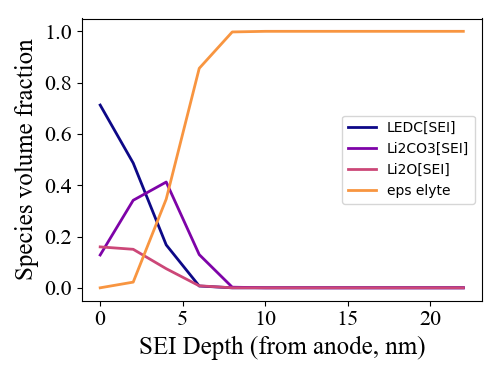

<IPython.core.display.Javascript object>


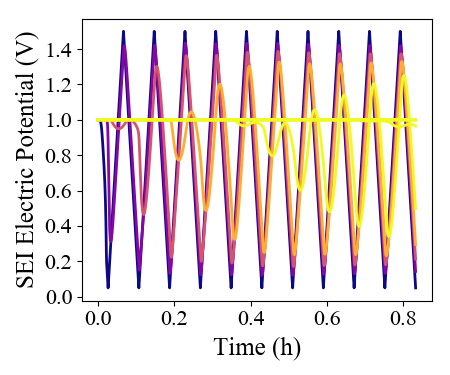

<IPython.core.display.Javascript object>


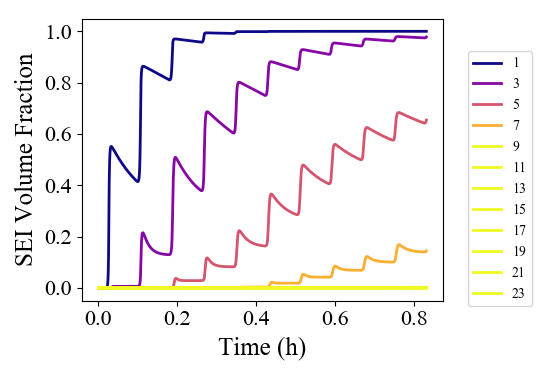

In [6]:

from sei_1d_init import voltage_lookup, objs, params
from matplotlib import pyplot as plt
import numpy as np

labelfont = 18
tickfont = 16

sei = objs['SEI']
elyte = objs['elyte']
names = list()
for i in range(sei.n_species):
    names.append(sei.species_names[i])

for i in range(params['Ny']):
    names.append('eps_sei_'+str(i))
names.append('Anode potential')
for i in range(params['Ny']):
    names.append('SEI potential_'+str(i))

phi_WE = np.interp(t,voltage_lookup['time'],voltage_lookup['voltage'])

SV = SV_detailed.T
SVptr = SVptr_detailed

profiles = SV[-1,SVptr['Ck sei']]
eps_k_sei = np.zeros_like(profiles)
colors = ['k','r','g','b','m']

cmap = plt.get_cmap('plasma')
ndata = 5#params['Ny']
color_ind = np.linspace(0,1,ndata)
colors = list()
for i in np.arange(ndata):
    colors.append(cmap(color_ind[i]))


icolor = 0
for i, p in enumerate(profiles):
    eps_sei = SV[-1,SVptr['eps sei'][i]]
    vol_k = p*sei.partial_molar_volumes
    v_tot = np.dot(p,sei.partial_molar_volumes)
    eps_k_sei[i,:] = eps_sei*vol_k/v_tot

    
fig5, ax5 = plt.subplots(1, 1, figsize=(5, 3.75))

    
for tick in ax5.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')
for tick in ax5.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')

names = list()
for i in range(sei.n_species):
    names.append(sei.species_names[i])
    ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],eps_k_sei[:,i],color=colors[i],linewidth=2.)
    
    
names.append('eps elyte')
ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],1.-SV[-1,SVptr['eps sei']],color=colors[sei.n_species],linewidth=2.)
ax5.legend(names)
ax5.set_ylabel('Species volume fraction',family='Times New Roman',fontsize=labelfont)
ax5.set_xlabel('SEI Depth (from anode, nm)',family='Times New Roman',fontsize=labelfont)
fig5.tight_layout()
plt.savefig('VolFrac_profiles.pdf',format='pdf',dpi=400)



cmap = plt.get_cmap('plasma')
ndata = params['Ny']
color_ind = np.linspace(0,3,ndata)
colors = list()
for i in np.arange(ndata):
    colors.append(cmap(color_ind[i]))
    
depths = list()
for i in range(params['Ny']):
    depths.append(str((round(1e9*(i+0.5)/params['dyInv'],2))))
v_names= list()
v_names.append('W anode')
v_names.append(depths)
fig3, ax3 = plt.subplots(1, 1, figsize=(4.5, 3.75))
    
for tick in ax3.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')
for tick in ax3.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')

# ax3.plot(t,phi_WE)
for i in range(params['Ny']):
    ax3.plot(t/3600,SV[:,SVptr['phi sei'][i]],color=colors[i],linewidth=2.)

ax3.set_xlabel('Time (h)',family='Times New Roman',fontsize=labelfont)
ax3.set_ylabel('SEI Electric Potential (V)',family='Times New Roman',fontsize=labelfont)
fig3.tight_layout()
# ax3.legend(depths)
plt.savefig('Potentials.pdf',format='pdf',dpi=400)



fig8, ax8 = plt.subplots(1, 1, figsize=(5.5,3.75))

for tick in ax8.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')
for tick in ax8.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')

depths = []
depth=-0.5e9/params['dyInv']
for i in range(params['Ny']):
    ax8.plot(t/3600, SV[:,SVptr['eps sei'][i]],color=colors[i], linewidth=2.)
    depth += 1e9/params['dyInv']
    depths.append(str(int(depth)))

ax8.set_xlabel('Time (h)',family='Times New Roman',fontsize=labelfont)
ax8.set_ylabel('SEI Volume Fraction',family='Times New Roman',fontsize=labelfont)
ax8.legend(depths, bbox_to_anchor=(1.05,0.91),prop={'family': 'Times New Roman'})
fig8.tight_layout()
plt.savefig('SEI_volFracs.pdf', format='pdf',dpi=400)

### Next the 'Homogeneous' model:

In [4]:
# If you've run this block before, re-set chdir back to its original value, first:
if previous:
    os.chdir(cwd)
    
# Get the current working directory:
cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+homogeneous_datafolder)

homogeneous_data = pd.read_csv('solution.csv',header=0)
SV_homogeneous = homogeneous_data.to_numpy()
# Get variable names:
f = open('names.csv','r')
names = csv.reader(f)
data_names = homogeneous_data.index.to_list()

i=0
for row in names:
    data_names[i]=(str('\t'.join(row)))
    i+=1

f.close()

homogeneous_data.index = data_names

# Transpose the data so that each row is for a time, and each column represents a variable:
homogeneous_data = homogeneous_data.T



from sei_1d_init_homogeneous import N_y, dy, nvars_node, objs, params
from sei_1d_init_homogeneous import SVptr as SVptr_homogeneous
from sei_1d_init_homogeneous import params as params_homogeneous
from sei_1d_init_homogeneous import SVptr as SVptr_homogeneous

print(params_homogeneous['Ny'])
print(SVptr_homogeneous['eps sei'])
print(SV_homogeneous.shape)
print(nvars_node)

t = np.asarray(detailed_data.index[:],dtype=float)






     Cantera phases created. 

The species in the electrolyte are:
bulk[C3H4O3]
bulk[C4H8O3]
LipElyt
PF6mElyt
C2H6O2(el)
H2O(el)
C2H4
CO
CO2


The species in the SEI are:
LEDC[SEI]
Li2CO3[SEI]
Li2O[SEI]
12
[  2  17  32  47  62  77  92 107 122 137 152 167]
(6, 820)
15


In [ ]:
# from sei_1d_init import voltage_lookup

sei = objs['SEI']
elyte = objs['elyte']
names = list()
for i in range(sei.n_species):
    names.append(sei.species_names[i])

for i in range(params['Ny']):
    names.append('eps_sei_'+str(i))
    
names.append('Anode potential')
for i in range(params['Ny']):
    names.append('SEI potential_'+str(i))

phi_WE = np.interp(t,voltage_lookup['time'],voltage_lookup['voltage'])

SV = SV_homogeneous.T
SVptr = SVptr_homogeneous
print(SV[-1])
print(SVptr)
profiles = SV[-1,SVptr['Ck sei']]
eps_k_sei = np.zeros_like(profiles)
colors = ['k','r','g','b','m']

cmap = plt.get_cmap('plasma')
ndata = 5#params['Ny']
color_ind = np.linspace(0,1,ndata)
colors = list()
for i in np.arange(ndata):
    colors.append(cmap(color_ind[i]))


icolor = 0
for i, p in enumerate(profiles):
    eps_sei = SV[-1,SVptr['eps sei'][i]]
    vol_k = p*sei.partial_molar_volumes
    v_tot = np.dot(p,sei.partial_molar_volumes)
    eps_k_sei[i,:] = eps_sei*vol_k/v_tot

### Last, the 'reduced' order model:

In [ ]:
# If you've run this block before, re-set chdir back to its original value, first:
if previous:
    os.chdir(cwd)
    
# Get the current working directory:
cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+reduced_datafolder)

reduced_data = pd.read_csv('solution.csv',header=0)

# Get variable names:
f = open('names.csv','r')
names = csv.reader(f)
data_names = reduced_data.index.to_list()

i=0
for row in names:
    data_names[i]=(str('\t'.join(row)))
    i+=1

f.close()

reduced_data.index = data_names

# Transpose the data so that each row is for a time, and each column represents a variable:
reduced_data = reduced_data.T

## Plot SEI thickness vs. time.

We start by finding the volumes at each time where $\varepsilon_{\rm SEI}$ is greater than a user-defined minimum. The SEI thickness is equal to the summed thickness of all but the final volume $\left(n-1\right)\Delta y$, plus a fractional thickness $\varepsilon_{\rm SEI}(t)\Delta y$ of the final such volume at time $t$:

In [ ]:
# This function calculates the SEI thickness for the detailed model:
def thickness_calc(eps_min):
    thickness = []
    eps_SEI = detailed_data['eps SEI']

    for j,eps in eps_SEI.iterrows():
        grown = []
        growth = eps[eps['eps SEI']>eps_min]
        if growth.empty:
            thickness.append(0.)
        else:
            #print(growth.iloc[-1])
            thickness.append((growth.count()-1.+growth.iloc[-1])*dy)
    return thickness
    
    
ndata = 5#params['Ny']
color_ind = np.linspace(0,1,ndata)
colors = list()
for i in np.arange(ndata):
    colors.append(cmap(color_ind[i]))
    
    
# All thicknesses calculated in nm:
detailed_t = np.asarray(detailed_data.index[:],dtype=float)
detailed_y = np.asarray(thickness_calc(eps_min))*1e9

homogeneous_t = np.asarray(homogeneous_data.index[:],dtype=float)
homogeneous_y = homogeneous_data['SEI thickness']*1e9

reduced_t = np.asarray(reduced_data.index[:],dtype=float)
reduced_y = reduced_data['SEI thickness']*1e9

fig, ax = plt.subplots(1, 1, figsize=(5, 3.75))
#ax = fig.add_axes([0.15,0.2,0.75,0.75])
#fig.set_size_inches((3.5,2.25))

plt.plot(reduced_t/3600,reduced_y,'k',linewidth=1.50)
plt.plot(homogeneous_t/3600,homogeneous_y,'r',linewidth=1.50)
plt.plot(detailed_t/3600,detailed_y,'b',markersize=1.50)

plt.xlim([0,1.0])
plt.ylim([0,20])
plt.xlabel('Time (h)')
plt.ylabel('SEI thickness (nm)')
#plt.xticks(np.array([0.,1000.,2000.,3000.,4000.]))


font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=labelfont)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')

ax.tick_params(axis="y",direction="in",length=5.5,right=True)
ax.tick_params(axis="x",direction="in",length=5.5,top=True)
ax.set_ylabel('SEI Thickness (nm)',fontsize=labelfont,family='Times New Roman',labelpad = 1.)
ax.set_xlabel('Time (h)',fontsize=labelfont,family='Times New Roman')
ax.legend(['Reduced Order','Homogeneous','Detailed'],frameon=False,prop=font)

fig.tight_layout()
plt.savefig('Thickness_vs_time.pdf',format='pdf',dpi=350)



fig, ax = plt.subplots(1, 1, figsize=(5, 3.75))

plt.plot(detailed_t/3600,detailed_y,'b',markersize=1.50)

plt.xlim([0,1.0])
plt.ylim([0,20])
plt.xlabel('Time (h)')
plt.ylabel('SEI thickness (nm)')


font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=labelfont)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(tickfont)
    tick.label1.set_fontname('Times New Roman')

ax.tick_params(axis="y",direction="in",length=5.5,right=True)
ax.tick_params(axis="x",direction="in",length=5.5,top=True)
ax.set_ylabel('SEI Thickness (nm)',fontsize=labelfont,family='Times New Roman',labelpad = 1.)
ax.set_xlabel('Time (h)',fontsize=labelfont,family='Times New Roman')


fig.tight_layout()
plt.savefig('Thickness_vs_time_detailed.pdf',format='pdf',dpi=350)

# Set cwd back to original value
os.chdir(cwd)


## Plot species profiles vs. time.

In [ ]:
#t, SV, SVptr, objs, params

from sei_1d_init import voltage_lookup, objs
from matplotlib import pyplot as plt
import numpy as np

sei = objs['SEI']
elyte = objs['elyte']
names = list()
for i in range(sei.n_species):
    names.append(sei.species_names[i])

for i in range(params['Ny']):
    names.append('eps_sei_'+str(i))
names.append('Anode potential')
for i in range(params['Ny']):
    names.append('SEI potential_'+str(i))

    
def plot_vol_fracs(data,ax,ptr,params):   
    time = np.asarray(data.index[:],dtype=float)
    depths = list()
    SV = data.to_numpy()
    print(SV[-1,:])
    for i in range(params['Ny']):
        print(i)
        print(ptr['eps sei'][i])
        print(SV.shape)
        ax.plot(time,SV[:,ptr['eps sei'][i]])
        depths.append(str((round(1e9*(i+0.5)/params['dyInv'],2))))
        
        
#     phi_WE = np.interp(t,voltage_lookup['time'],voltage_lookup['voltage'])

#     fig, ax1 = plt.subplots(1, 1, figsize=(8., 7.2))
#     ax1.plot(t,SV[:,SVptr['Ck sei'][0,:].astype(int)])
#     ax1.legend(names)
#     ax1.set_ylabel('Molar concentration (kmol/m3) in first SEI layer.')
#     ax1.set_xlabel('time (s)')
#     plt.savefig('Figure1.pdf',format='pdf',dpi=350)

detailed_t = np.asarray(detailed_data.index[:],dtype=float)

    
    
    
fig2, ax2 = plt.subplots(1, 1, figsize=(8., 7.2))

plot_vol_fracs(detailed_data,ax2,SVptr_detailed,params_detailed)

ax2.set_xlabel('time (s)')
ax2.set_ylabel('Volume fraction of SEI')
ax2.legend(depths)


# if 1:
#     v_names= list()
#     v_names.append('W anode')
#     v_names.append(depths)
#     fig3, ax3 = plt.subplots(1, 1, figsize=(8., 7.2))
#     ax3.plot(t,phi_WE)
#     for i in range(params['Ny']):
#         ax3.plot(t,SV[:,SVptr['phi sei'][i]])

#     ax3.set_xlabel('time (s)')
#     ax3.set_ylabel('SEI Electric Potential (V)')
#     ax3.legend(depths)


# profiles = SV[-1,SVptr['Ck sei']]
# eps_k_sei = np.zeros_like(profiles)
# for i, p in enumerate(profiles):
#     eps_sei = SV[-1,SVptr['eps sei'][i]]
#     vol_k = p*sei.partial_molar_volumes
#     v_tot = np.dot(p,sei.partial_molar_volumes)
#     eps_k_sei[i,:] = eps_sei*vol_k/v_tot


# names = list()
# for i in range(sei.n_species):
#     names.append(sei.species_names[i])
# names.append('eps elyte')
# fig5, ax5 = plt.subplots(1, 1, figsize=(8, 7.2))
# ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],eps_k_sei)
# ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],1.-SV[-1,SVptr['eps sei']])
# ax5.legend(names)
# ax5.set_ylabel('Species volume fraction')
# ax5.set_xlabel('SEI Depth (from anode, nm)')

# names = list()
# for i in range(elyte.n_species):
#     names.append(elyte.species_names[i])
# elyte_profiles = SV[-1,SVptr['Ck elyte']]
# fig6, ax6 = plt.subplots(1, 1, figsize=(8, 7.2))
# ax6.plot(1e9*np.arange(params['Ny'])/params['dyInv'],elyte_profiles)
# #ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],1.-SV[-1,SVptr['eps sei']])
# ax6.legend(names)
# ax6.set_ylabel('Electrolyte species concentration (kmol/m3)')
# ax5.set_xlabel('SEI Depth (from anode, nm)')

# fig7, ax7 = plt.subplots(1, 1, figsize=(8., 7.2))
# ax7.plot(t,SV[:,SVptr['Ck elyte'][0,:].astype(int)])
# ax7.legend(names)
# ax7.set_ylabel('Molar concentration (kmol/m3) in first elyte layer.')
# ax7.set_xlabel('time (s)')

In [9]:
os.chdir(cwd)